In [152]:
import pandas as pd
import numpy as np

In [153]:
df=pd.read_csv('customer_data.csv',encoding='unicode_escape')

In [154]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12-09-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12-09-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12-09-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12-09-2011 12:50,4.15,12680.0,France


In [155]:
df.shape

(541909, 8)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [157]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## Handle missing values

In [158]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [159]:
df['Description'].mode()

0    WHITE HANGING HEART T-LIGHT HOLDER
dtype: object

In [160]:
df.CustomerID.mode()

0    17841.0
dtype: float64

In [161]:
# customer_data.CustomerID.isna()
a=df[df["CustomerID"].isnull()]["Country"].unique()
a

array(['United Kingdom', 'EIRE', 'Bahrain', 'Israel', 'Hong Kong',
       'Unspecified', 'France', 'Switzerland', 'Portugal'], dtype=object)

In [162]:
[df["CustomerID"].isnull() & df["Country"]==a[0]]

[0         False
 1         False
 2         False
 3         False
 4         False
           ...  
 541904    False
 541905    False
 541906    False
 541907    False
 541908    False
 Length: 541909, dtype: bool]

In [163]:
df[df["Description"].isnull()]["Country"].unique()

array(['United Kingdom'], dtype=object)

In [164]:
# as data is large in size so if we drop some values it will to harm accuracy so much
df.dropna(inplace=True)

In [165]:
df.reset_index(drop=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12-09-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12-09-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12-09-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12-09-2011 12:50,4.15,12680.0,France


In [166]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [167]:
df.shape

(406829, 8)

## Now data not contain any null value

In [168]:
column_name=df.columns
column_name

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [169]:
print("Unique values in each column")
for i in column_name:
    print(i,"\n",df[i].unique())

Unique values in each column
InvoiceNo 
 ['536365' '536366' '536367' ... '581585' '581586' '581587']
StockCode 
 ['85123A' '71053' '84406B' ... '90214Z' '90089' '23843']
Description 
 ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'PINK CRYSTAL SKULL PHONE CHARM'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
Quantity 
 [     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    288    -12    -24
     16      9    128     25     30     28      7     72    200    600
    480     -6     14     -2     -4     -5     -7     -3     11     70
    252     60    216    384     27    108     52  -9360     75    270
     42    240     90    320     17   1824    204     69    -36   -192
   -144    160   2880   1400     19     39    -48    -50     56     13
   1440     -8     15    720    -20  

 4.76000e+00 2.24690e+02]
CustomerID 
 [17850. 13047. 12583. ... 13298. 14569. 12713.]
Country 
 ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Unspecified' 'Brazil' 'USA' 'European Community' 'Bahrain' 'Malta' 'RSA']


In [170]:
for i in column_name:
    print(i,"\n",df[i].value_counts())

InvoiceNo 
 576339     542
579196     533
580727     529
578270     442
573576     435
          ... 
C562910      1
C548941      1
C559022      1
566080       1
C554533      1
Name: InvoiceNo, Length: 22190, dtype: int64
StockCode 
 85123A    2077
22423     1905
85099B    1662
84879     1418
47566     1416
          ... 
90046        1
90001A       1
90048        1
90024C       1
85224        1
Name: StockCode, Length: 3684, dtype: int64
Description 
 WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
                                      ... 
NEW BAROQUE B'FLY NECKLACE PINK          1
LARGE BLACK DIAMANTE HAIRSLIDE           1
CRACKED GLAZE EARRINGS BROWN             1
BAROQUE BUTTERFLY EARRINGS CRYSTAL       1
ZINC PLANT POT HOLDER                    1
Name: Description, Length: 3896, dtype: int64
Quantity 
  1      73314

In [171]:
df['Quantity'].max()

80995

In [172]:
df[(df['Quantity']>0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12-09-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12-09-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12-09-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12-09-2011 12:50,4.15,12680.0,France


In [173]:
df[(df['Quantity']<0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12-01-2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12-01-2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12-01-2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12-01-2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12-01-2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12-09-2011 09:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12-09-2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12-09-2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12-09-2011 11:58,1.25,17315.0,United Kingdom


In [174]:
cancelled_order=df[(df['Quantity']<0)]

In [175]:
cancelled_order

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12-01-2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12-01-2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12-01-2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12-01-2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12-01-2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12-09-2011 09:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12-09-2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12-09-2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12-09-2011 11:58,1.25,17315.0,United Kingdom


In [176]:
cancelled_order.shape

(8905, 8)

In [177]:
countries=df['Country'].unique()
# countries
for i in countries:
    print(df[(df['Country']==i) &(df['Quantity']<0)])

       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

             InvoiceDate  UnitPrice  CustomerID         Country  
141     12-01-2010 09:41      27.50     14527

       InvoiceNo StockCode                          Description  Quantity  \
88130    C543773     21218               RED SPOTTY BISCUIT TIN        -1   
88131    C543773     22626                 BLACK KITCHEN SCALES        -1   
152236   C549580     22968           ROSE COTTAGE KEEPSAKE BOX         -3   
164783   C550668     22636   CHILDS BREAKFAST SET CIRCUS PARADE        -6   
164795   C550672     23199                     JUMBO BAG APPLES      -100   
172914   C551587     22776          SWEETHEART CAKESTAND 3 TIER        -1   
172915   C551587     21843             RED RETROSPOT CAKE STAND        -3   
225043   C556635     23089                    GLASS BON BON JAR        -2   
225044   C556635     22699     ROSES REGENCY TEACUP AND SAUCER         -1   
225045   C556635     22697      GREEN REGENCY TEACUP AND SAUCER        -1   
225046   C556635     22423             REGENCY CAKESTAND 3 TIER        -1   
265299   C560219     84012  MAGIC SHEEP WOOL GROWING FROM PAPER      -120   

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []
       InvoiceNo StockCode                          Description  Quantity  \
47163    C540392     21155                RED RETROSPOT PEG BAG        -1   
47164    C540392     22244           3 HOOK HANGER MAGIC GARDEN        -1   
47165    C540392     22088          PAPER BUNTING COLOURED LACE       -40   
47166    C540392     22567              20 DOLLY PEGS RETROSPOT        -3   
107444   C545446     22957  SET 3 PAPER VINTAGE CHICK PAPER EGG       -12   
107445   C545446     22654                   DELUXE SEWING KIT         -2   
107446   C545446     22661      CHARLOTTE BAG DOLLY GIRL DESIGN        -1   
107447   C545446     20725              LUNCH BAG RED RETROSPOT        -1   
107448   C545446     20724          RED RETROSPOT CHARLOTTE BAG        -1   
111519   C545739         M                               Manual        -1   
112245   C545891         M 

       InvoiceNo StockCode                       Description  Quantity  \
30078    C538847    85232B   SET OF 3 BABUSHKA STACKING TINS      -240   
43448    C540057      POST                           POSTAGE        -1   
115928   C546162     85178              VICTORIAN SEWING KIT      -144   
172912   C551585     22779        WOODEN OWLS LIGHT GARLAND         -2   
174960   C551864     22779        WOODEN OWLS LIGHT GARLAND         -2   
304625   C563586     22077            6 RIBBONS RUSTIC CHARM        -6   
449039   C575081     23480    MINI LIGHTS WOODLAND MUSHROOMS        -5   
449040   C575081     22633            HAND WARMER UNION JACK        -1   
481876   C577363     23235          STORAGE TIN VINTAGE LEAF        -3   
492135   C578090      POST                           POSTAGE        -2   
527314   C580702     23494  VINTAGE DOILY DELUXE SEWING KIT        -40   

             InvoiceDate  UnitPrice  CustomerID Country  
30078   12/14/2010 13:27       4.95     17404.0  Swed

       InvoiceNo StockCode                          Description  Quantity  \
229422   C557054    72807C  SET/3 VANILLA SCENTED CANDLE IN BOX        -1   
229423   C557054    72807A    SET/3 ROSE CANDLE IN JEWELLED BOX        -2   
316219   C564751     22065       CHRISTMAS PUDDING TRINKET POT         -4   
316220   C564751     22768           FAMILY PHOTO FRAME CORNICE        -1   
475511   C576898      POST                              POSTAGE        -2   
494784   C578274     22768           FAMILY PHOTO FRAME CORNICE        -2   
494785   C578274    85034C          3 ROSE MORRIS BOXED CANDLES        -1   
494786   C578274    72807C  SET/3 VANILLA SCENTED CANDLE IN BOX        -1   
494787   C578274     22307     GOLD MUG BONE CHINA TREE OF LIFE        -1   
494788   C578274     72741                GRAND CHOCOLATECANDLE        -3   
516550   C579929     22768           FAMILY PHOTO FRAME CORNICE        -2   
516551   C579929    85034C          3 ROSE MORRIS BOXED CANDLES        -1   

In [178]:
df[(df['Country']=="United Kingdom") &(df['Quantity']<0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12-01-2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12-01-2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12-01-2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12-01-2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12-01-2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12-09-2011 09:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12-09-2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12-09-2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12-09-2011 11:58,1.25,17315.0,United Kingdom


In [179]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
                                      ... 
NEW BAROQUE B'FLY NECKLACE PINK          1
LARGE BLACK DIAMANTE HAIRSLIDE           1
CRACKED GLAZE EARRINGS BROWN             1
BAROQUE BUTTERFLY EARRINGS CRYSTAL       1
ZINC PLANT POT HOLDER                    1
Name: Description, Length: 3896, dtype: int64

# Feature Extraction

In [180]:
df['InvoiceDate']= pd.to_datetime(df["InvoiceDate"])
df['Day_of_Month']=df["InvoiceDate"].dt.day
df['Month']=df["InvoiceDate"].dt.month
df['Year']=df["InvoiceDate"].dt.year

In [181]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day_of_Month,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,9,12,2011
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,9,12,2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,9,12,2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,9,12,2011


In [182]:
df['Total_amount']=df['Quantity']*df['UnitPrice']

In [183]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day_of_Month,Month,Year,Total_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,12,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,12,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,9,12,2011,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,9,12,2011,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,9,12,2011,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,9,12,2011,16.60


In [184]:
# EXTRACT(HOUR from CAST(to_char(tran_datetime,'DD-MON-YYYY HH:MI:SS') AS TIMESTAMP)) 

In [185]:
df['hour']=pd.DatetimeIndex(df['InvoiceDate']).hour

In [186]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day_of_Month,Month,Year,Total_amount,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,12,2010,15.30,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,20.34,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,12,2010,22.00,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,20.34,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,20.34,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,9,12,2011,10.20,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,9,12,2011,12.60,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,9,12,2011,16.60,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,9,12,2011,16.60,12


In [187]:
# if(customer_data['hour'].item()>0 and customer_data['hour'].item()<12):
#     customer_data['Time_period'].item()='Morning'
# elif(customer_data['hour'].item()>=12 and customer_data['hour'].item()<=15):
#     customer_data['Time_period'].item()='Afternoon'
# elif(customer_data['hour'].item()>=16 and customer_data['hour'].item()<=19):
#     customer_data['Time_period'].item()='Evening'
# else:
#     customer_data['Time_period'].item()='Night'

In [188]:
# for i in customer_data['hour']:
#     if(i >0 and i <12):
#         customer_data['Time_period']='Morning'
#     elif(i >=12 and i <=15):
#         customer_data['Time_period']='Afternoon'
#     elif(i >=16 and i <=19):
#         customer_data['Time_period']='Evening'
#     else:
#         customer_data['Time_period']='Night'

In [189]:
sessions=["Late Night","Early Morning","Morning","Afternoon","Evening","Night"]
hours=[0,4,8,12,16,20,24]
df['Sessions']=pd.cut(df['hour'],bins=hours,labels=sessions,include_lowest=True)

In [190]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day_of_Month,Month,Year,Total_amount,hour,Sessions
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,12,2010,15.30,8,Early Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,20.34,8,Early Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,12,2010,22.00,8,Early Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,20.34,8,Early Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,20.34,8,Early Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,9,12,2011,10.20,12,Morning
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,9,12,2011,12.60,12,Morning
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,9,12,2011,16.60,12,Morning
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,9,12,2011,16.60,12,Morning


In [191]:
# customer_data=df

In [192]:
customer_data=df.drop('InvoiceDate',axis=1)

In [193]:
customer_data

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Day_of_Month,Month,Year,Total_amount,hour,Sessions
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,1,12,2010,15.30,8,Early Morning
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,1,12,2010,20.34,8,Early Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,1,12,2010,22.00,8,Early Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,1,12,2010,20.34,8,Early Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,1,12,2010,20.34,8,Early Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,9,12,2011,10.20,12,Morning
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,9,12,2011,12.60,12,Morning
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,9,12,2011,16.60,12,Morning
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,9,12,2011,16.60,12,Morning


In [194]:
customer_data['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
                                      ... 
NEW BAROQUE B'FLY NECKLACE PINK          1
LARGE BLACK DIAMANTE HAIRSLIDE           1
CRACKED GLAZE EARRINGS BROWN             1
BAROQUE BUTTERFLY EARRINGS CRYSTAL       1
ZINC PLANT POT HOLDER                    1
Name: Description, Length: 3896, dtype: int64

In [195]:
customer_data.describe()

,Quantity,UnitPrice,CustomerID,Day_of_Month,Month,Year,Total_amount,hour
count,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570,15.036128,7.605947,2010.934002,20.401854,12.737472
std,248.693370,69.315162,1713.600303,8.653730,3.418942,0.248279,427.591718,2.284952
min,-80995.000000,0.000000,12346.000000,1.000000,1.000000,2010.000000,-168469.600000,6.000000
25%,2.000000,1.250000,13953.000000,7.000000,5.000000,2011.000000,4.200000,11.000000
50%,5.000000,1.950000,15152.000000,15.000000,8.000000,2011.000000,11.100000,13.000000
75%,12.000000,3.750000,16791.000000,22.000000,11.000000,2011.000000,19.500000,14.000000
max,80995.000000,38970.000000,18287.000000,31.000000,12.000000,2011.000000,168469.600000,20.000000


In [196]:
customer_shopping_fre=customer_data['CustomerID'].value_counts()
customer_shopping_fre=pd.DataFrame(customer_shopping_fre)
customer_shopping_fre

,CustomerID
17841.0,7983
14911.0,5903
14096.0,5128
12748.0,4642
14606.0,2782
...,...
12943.0,1
13135.0,1
18068.0,1
17347.0,1


# EDA

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns

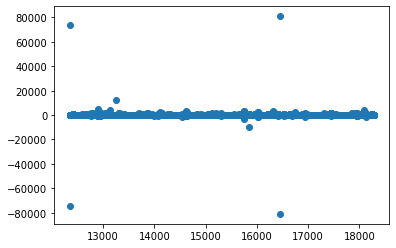

In [198]:
plt.scatter(x=customer_data['CustomerID'],y=customer_data['Quantity'])

<AxesSubplot:xlabel='UnitPrice'>

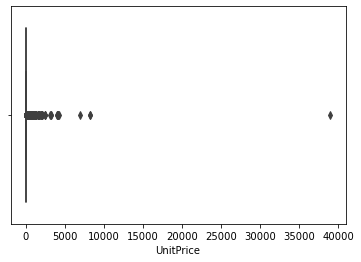

In [199]:
sns.boxplot(x=customer_data.UnitPrice)

<AxesSubplot:xlabel='Total_amount'>

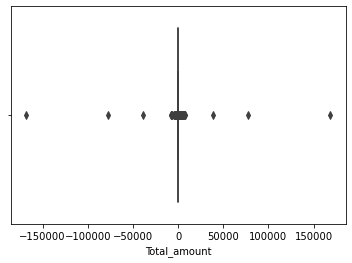

In [200]:
sns.boxplot(x=customer_data.Total_amount)

<AxesSubplot:xlabel='Sessions', ylabel='count'>

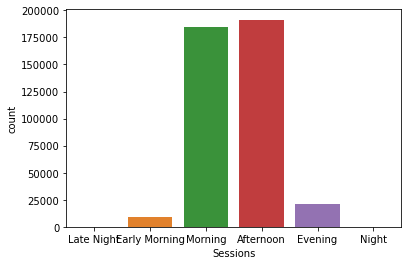

In [201]:
sns.countplot(x=customer_data['Sessions'])

<AxesSubplot:xlabel='Day_of_Month', ylabel='count'>

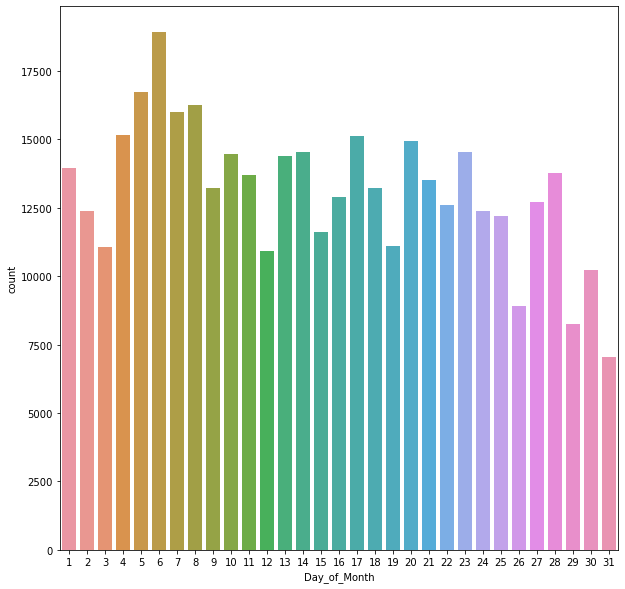

In [202]:
plt.figure(figsize=(10,10))
sns.countplot(x=customer_data['Day_of_Month'])

<AxesSubplot:xlabel='Month', ylabel='count'>

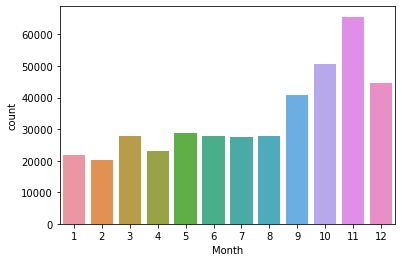

In [203]:
sns.countplot(x=customer_data['Month'])

<AxesSubplot:xlabel='Year', ylabel='count'>

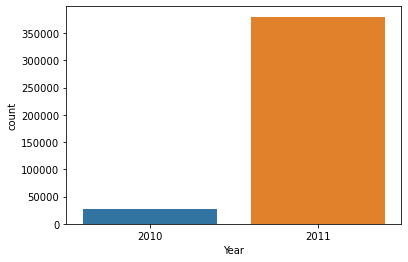

In [204]:
sns.countplot(x=customer_data['Year'])

<AxesSubplot:>

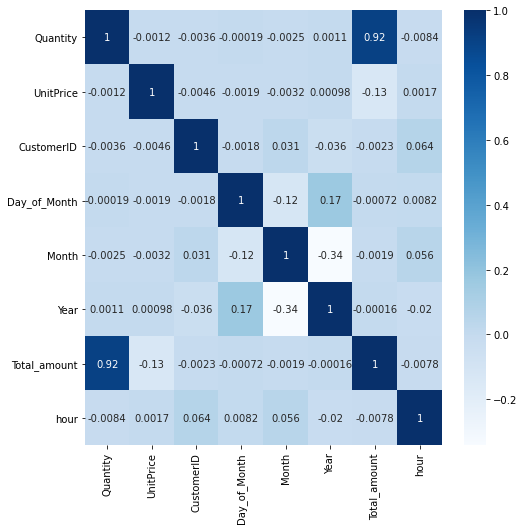

In [205]:
plt.figure(figsize=(8,8))
sns.heatmap(customer_data.corr(),annot=True,cmap='Blues')

<AxesSubplot:ylabel='UnitPrice'>

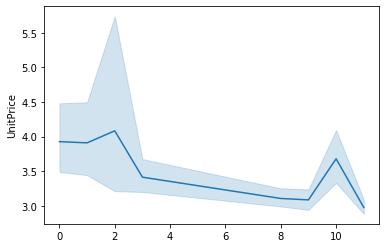

In [206]:
sns.lineplot(x=customer_data['Year']&customer_data['Month'],y=customer_data['UnitPrice'],data=customer_data)

<AxesSubplot:xlabel='CustomerID', ylabel='UnitPrice'>

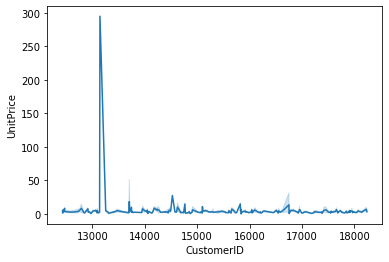

In [207]:
sns.lineplot(x=customer_data['CustomerID'].head(4000),y=customer_data['UnitPrice'],data=customer_data)

<AxesSubplot:xlabel='CustomerID', ylabel='Quantity'>

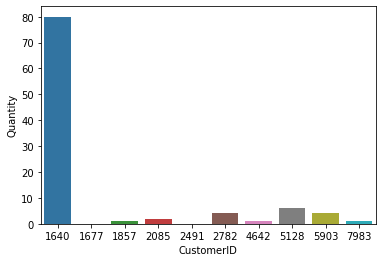

In [208]:
sns.barplot(x=customer_data['CustomerID'].value_counts().head(10),y=customer_data['Quantity'])

In [209]:
# sns.histplot(x=customer_data['Country'])
customer_data['Country'].value_counts().count()

37

In [210]:
countries=customer_data['Country'].unique()
countries

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

<AxesSubplot:xlabel='Country', ylabel='count'>

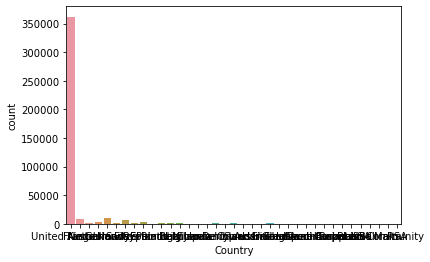

In [211]:
# sns.barplot(x=customer_data['Country'].,y=customer_data['Country'].value_counts().head(10))
sns.countplot(x=customer_data['Country'])

<AxesSubplot:xlabel='Country', ylabel='Quantity'>

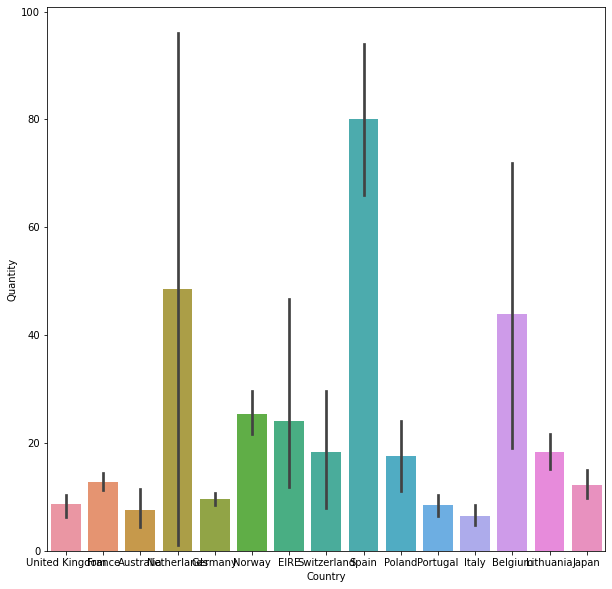

In [212]:
plt.figure(figsize=(10,10))
sns.barplot(x=customer_data['Country'].head(10000),y=customer_data['Quantity'])

# Model Implementation

In [213]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   InvoiceNo     406829 non-null  object  
 1   StockCode     406829 non-null  object  
 2   Description   406829 non-null  object  
 3   Quantity      406829 non-null  int64   
 4   UnitPrice     406829 non-null  float64 
 5   CustomerID    406829 non-null  float64 
 6   Country       406829 non-null  object  
 7   Day_of_Month  406829 non-null  int64   
 8   Month         406829 non-null  int64   
 9   Year          406829 non-null  int64   
 10  Total_amount  406829 non-null  float64 
 11  hour          406829 non-null  int64   
 12  Sessions      406829 non-null  category
dtypes: category(1), float64(3), int64(5), object(4)
memory usage: 60.7+ MB


In [214]:
# customer_data=customer_data.drop('total_amount',axis=1)

In [215]:
# customer_data=customer_data.drop('Time_period',axis=1)

In [216]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   InvoiceNo     406829 non-null  object  
 1   StockCode     406829 non-null  object  
 2   Description   406829 non-null  object  
 3   Quantity      406829 non-null  int64   
 4   UnitPrice     406829 non-null  float64 
 5   CustomerID    406829 non-null  float64 
 6   Country       406829 non-null  object  
 7   Day_of_Month  406829 non-null  int64   
 8   Month         406829 non-null  int64   
 9   Year          406829 non-null  int64   
 10  Total_amount  406829 non-null  float64 
 11  hour          406829 non-null  int64   
 12  Sessions      406829 non-null  category
dtypes: category(1), float64(3), int64(5), object(4)
memory usage: 60.7+ MB


In [217]:
customer_data=customer_data.iloc[:,[0,1,2,3,4,5,6,7,8,9,11,12,10]]

In [218]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   InvoiceNo     406829 non-null  object  
 1   StockCode     406829 non-null  object  
 2   Description   406829 non-null  object  
 3   Quantity      406829 non-null  int64   
 4   UnitPrice     406829 non-null  float64 
 5   CustomerID    406829 non-null  float64 
 6   Country       406829 non-null  object  
 7   Day_of_Month  406829 non-null  int64   
 8   Month         406829 non-null  int64   
 9   Year          406829 non-null  int64   
 10  hour          406829 non-null  int64   
 11  Sessions      406829 non-null  category
 12  Total_amount  406829 non-null  float64 
dtypes: category(1), float64(3), int64(5), object(4)
memory usage: 60.7+ MB


In [219]:
customer_data_withoutDescription=customer_data.drop('Description',axis=1)

In [220]:
customer_data_withoutDescription.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   InvoiceNo     406829 non-null  object  
 1   StockCode     406829 non-null  object  
 2   Quantity      406829 non-null  int64   
 3   UnitPrice     406829 non-null  float64 
 4   CustomerID    406829 non-null  float64 
 5   Country       406829 non-null  object  
 6   Day_of_Month  406829 non-null  int64   
 7   Month         406829 non-null  int64   
 8   Year          406829 non-null  int64   
 9   hour          406829 non-null  int64   
 10  Sessions      406829 non-null  category
 11  Total_amount  406829 non-null  float64 
dtypes: category(1), float64(3), int64(5), object(3)
memory usage: 57.6+ MB


In [221]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [222]:
customer_data_withoutDescription['InvoiceNo']=labelencoder.fit_transform(customer_data_withoutDescription['InvoiceNo'])
customer_data_withoutDescription['StockCode']=labelencoder.fit_transform(customer_data_withoutDescription['StockCode'])
customer_data_withoutDescription['Country']=labelencoder.fit_transform(customer_data_withoutDescription['Country'])

In [223]:
customer_data_withoutDescription['Sessions']=labelencoder.fit_transform(customer_data_withoutDescription['Sessions'])

In [224]:
customer_data_withoutDescription.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   InvoiceNo     406829 non-null  int32  
 1   StockCode     406829 non-null  int32  
 2   Quantity      406829 non-null  int64  
 3   UnitPrice     406829 non-null  float64
 4   CustomerID    406829 non-null  float64
 5   Country       406829 non-null  int32  
 6   Day_of_Month  406829 non-null  int64  
 7   Month         406829 non-null  int64  
 8   Year          406829 non-null  int64  
 9   hour          406829 non-null  int64  
 10  Sessions      406829 non-null  int32  
 11  Total_amount  406829 non-null  float64
dtypes: float64(3), int32(4), int64(5)
memory usage: 54.1 MB


In [225]:
X=customer_data_withoutDescription.iloc[:,:-1]

In [226]:
X

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,Day_of_Month,Month,Year,hour,Sessions
0,0,3249,6,2.55,17850.0,35,1,12,2010,8,1
1,0,2649,6,3.39,17850.0,35,1,12,2010,8,1
2,0,2855,8,2.75,17850.0,35,1,12,2010,8,1
3,0,2803,6,3.39,17850.0,35,1,12,2010,8,1
4,0,2802,6,3.39,17850.0,35,1,12,2010,8,1
...,...,...,...,...,...,...,...,...,...,...,...
541904,18535,1470,12,0.85,12680.0,13,9,12,2011,12,3
541905,18535,1746,6,2.10,12680.0,13,9,12,2011,12,3
541906,18535,2086,4,4.15,12680.0,13,9,12,2011,12,3
541907,18535,2087,4,4.15,12680.0,13,9,12,2011,12,3


In [227]:
Y=customer_data_withoutDescription.iloc[:,-1]

In [228]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [229]:
x_train

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,Day_of_Month,Month,Year,hour,Sessions
102758,3300,2810,1,1.65,14573.0,35,25,2,2011,17,2
396905,13994,803,4,0.39,17614.0,35,13,10,2011,16,0
422198,14820,812,10,0.39,13263.0,35,27,10,2011,13,0
367679,13048,315,1,0.95,15050.0,35,29,9,2011,13,0
337259,12038,2024,12,2.89,17719.0,35,12,9,2011,15,0
...,...,...,...,...,...,...,...,...,...,...,...
477422,16570,567,1,2.95,12748.0,35,17,11,2011,14,0
475721,16503,2401,12,0.42,17461.0,35,17,11,2011,10,3
213726,7570,3145,4,4.15,12662.0,14,5,6,2011,13,0
169166,5736,1088,5,8.50,15145.0,35,26,4,2011,16,0


In [230]:
x_test

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,Day_of_Month,Month,Year,hour,Sessions
209444,7431,172,3,1.65,15039.0,35,1,6,2011,13,0
389683,13764,761,2,2.46,14096.0,35,10,10,2011,17,2
184515,6342,1784,12,1.95,12749.0,35,10,5,2011,15,0
98089,3137,1743,50,2.10,17511.0,35,22,2,2011,15,0
268149,9512,11,96,0.14,13911.0,35,18,7,2011,13,0
...,...,...,...,...,...,...,...,...,...,...,...
197656,6908,590,6,5.95,17926.0,35,20,5,2011,9,3
196947,6873,1905,2,8.25,15791.0,35,19,5,2011,15,0
425759,14959,2152,2,1.25,14546.0,35,30,10,2011,11,3
454943,15896,791,5,1.63,14096.0,35,10,11,2011,12,3


In [231]:
y_train

102758     1.65
396905     1.56
422198     3.90
367679     0.95
337259    34.68
          ...  
477422     2.95
475721     5.04
213726    16.60
169166    42.50
410119    12.75
Name: Total_amount, Length: 284780, dtype: float64

In [232]:
y_test

209444      4.95
389683      4.92
184515     23.40
98089     105.00
268149     13.44
           ...  
197656     35.70
196947     16.50
425759      2.50
454943      8.15
373370     17.70
Name: Total_amount, Length: 122049, dtype: float64

In [233]:
from sklearn import preprocessing
x_train_norm = preprocessing.normalize(x_train)
x_test_norm = preprocessing.normalize(x_test)

## Linear Regression

In [234]:
from sklearn.linear_model import LinearRegression
linear_regression= LinearRegression()

In [235]:
linear_regression.fit(x_train,y_train)

LinearRegression()

In [236]:
y_predict_test=linear_regression.predict(x_test)

In [237]:
y_predict_train=linear_regression.predict(x_train)

## Ridge Regressor

In [238]:
from sklearn.linear_model import Ridge
ridge_regressor=Ridge(alpha=0.5)

In [239]:
ridge_regressor.fit(x_train,y_train)

Ridge(alpha=0.5)

In [240]:
y_predict_test_ridge=ridge_regressor.predict(x_test)

In [241]:
y_predict_train_ridge=ridge_regressor.predict(x_train)

## Decision Tree Regression

In [242]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_reg=DecisionTreeRegressor()

In [243]:
decision_tree_reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [244]:
y_predict_test_dtr=decision_tree_reg.predict(x_test)

In [245]:
y_predict_train_dtr=decision_tree_reg.predict(x_train)

## Random Forest Regression

In [246]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor=RandomForestRegressor(n_estimators=300,max_depth=8,random_state=50,
                                   min_samples_leaf=3 ,min_samples_split=8)

In [247]:
rf_regressor.fit(x_train,y_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=300, random_state=50)

In [248]:
y_predict_test_rfr=rf_regressor.predict(x_test)

In [249]:
y_predict_train_rfr=rf_regressor.predict(x_train)

## Model Evaluation

In [250]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from math import sqrt

## Linear Regression

In [251]:
print("          Training Data Evaluation      ")
print("Mean Absolute error : ",mean_absolute_error(y_predict_train,y_train))
print("Mean Squared error : ",mean_squared_error(y_predict_train,y_train))
print("Root Mean Squared error : ",sqrt(mean_squared_error(y_train,y_predict_train)))
print("R2 Score: ",r2_score(y_train,y_predict_train))
print("\n")
print("          Testing Data Evaluation      ")
print("Mean Absolute error :  ",mean_absolute_error(y_predict_test,y_test))
print("Mean Squared error : ",mean_squared_error(y_predict_test,y_test))
print("Root Mean Squared error : ",sqrt(mean_squared_error(y_test,y_predict_test)))
print("R2 Score : ",r2_score(y_test,y_predict_test))

          Training Data Evaluation      
Mean Absolute error :  16.228556452500232
Mean Squared error :  27328.205270725128
Root Mean Squared error :  165.31244741617348
R2 Score:  0.8280334438591301


          Testing Data Evaluation      
Mean Absolute error :   16.267701505335477
Mean Squared error :  29902.00378801526
Root Mean Squared error :  172.92195866348283
R2 Score :  0.8746989069288257


## Ridge Regressor

In [252]:
print("         Training Data Evaluation      ")
print("Mean Absolute error : ",mean_absolute_error(y_predict_train_ridge,y_train))
print("Mean Squared error : ",mean_squared_error(y_predict_train_ridge,y_train))
print("Root Mean Squared error : ",sqrt(mean_squared_error(y_train,y_predict_train_ridge)))
print("R2 Score : ",r2_score(y_train,y_predict_train_ridge))

print("\n")
print("         Testing Data Evaluation      ")
print("Mean Absolute error :  ",mean_absolute_error(y_predict_test_ridge,y_test))
print("Mean Squared error : ",mean_squared_error(y_predict_test_ridge,y_test))
print("Root Mean Squared error : ",sqrt(mean_squared_error(y_test,y_predict_test_ridge)))
print("R2 Score : ",r2_score(y_test,y_predict_test_ridge))

         Training Data Evaluation      
Mean Absolute error :  16.22854072232023
Mean Squared error :  27328.205270775175
Root Mean Squared error :  165.31244741632486
R2 Score :  0.8280334438588152


         Testing Data Evaluation      
Mean Absolute error :   16.267683829384442
Mean Squared error :  29902.001981603782
Root Mean Squared error :  172.9219534402841
R2 Score :  0.8746989144983964


## Decision Tree Regressor

In [253]:
print("           Training Data Evaluation      ")
print("Mean Absolute error : ",mean_absolute_error(y_predict_train_dtr,y_train))
print("Mean Squared error : ",mean_squared_error(y_predict_train_dtr,y_train))
print("Root Mean Squared error : ",sqrt(mean_squared_error(y_train,y_predict_train_dtr)))
print("R2 Score : ",r2_score(y_train,y_predict_train_dtr))
print("\n")
print("           Testing Data Evaluation      ")
print("Mean Absolute error :  ",mean_absolute_error(y_predict_test_dtr,y_test))
print("Mean Squared error : ",mean_squared_error(y_predict_test_dtr,y_test))
print("R2 Score : ",r2_score(y_test,y_predict_test_dtr))


           Training Data Evaluation      
Mean Absolute error :  1.5954830652364928e-13
Mean Squared error :  1.4864766421112622e-25
Root Mean Squared error :  3.8554852380877587e-13
R2 Score :  1.0


           Testing Data Evaluation      
Mean Absolute error :   1.2953269752314174
Mean Squared error :  68934.39982952586
R2 Score :  0.711137898647886


## Random forest Regressor

In [254]:
print("             Training Data Evaluation      ")
print("Mean Absolute error : ",mean_absolute_error(y_predict_train_rfr,y_train))
print("Mean Squared error : ",mean_squared_error(y_predict_train_rfr,y_train))
print("Root Mean Squared error : ",sqrt(mean_squared_error(y_train,y_predict_train_rfr)))
print("R2 Score : ",r2_score(y_train,y_predict_train_rfr))


print("\n")
print("             Testing Data Evaluation      ")
print("Mean Absolute error :  ",mean_absolute_error(y_predict_test_rfr,y_test))
print("Mean Squared error : ",mean_squared_error(y_predict_test_rfr,y_test))
print("Root Mean Squared error : ",sqrt(mean_squared_error(y_test,y_predict_test_rfr)))
print("R2 Score : ",r2_score(y_test,y_predict_test_rfr))

             Training Data Evaluation      
Mean Absolute error :  10.632081912473899
Mean Squared error :  84325.769852889
Root Mean Squared error :  290.38899747216493
R2 Score :  0.4693682921409008


             Testing Data Evaluation      
Mean Absolute error :   11.707278146982993
Mean Squared error :  226794.2873520435
Root Mean Squared error :  476.2292382372627
R2 Score :  0.04964321759270107


In [255]:
Models=['Linear Regression','Ridge Regressor','Decision Tree Regressor','Random Forest Regressor']
MAE=[mean_absolute_error(y_predict_train,y_train),
                     mean_absolute_error(y_predict_train_ridge,y_train),
                     mean_absolute_error(y_predict_train_dtr,y_train),
                     mean_absolute_error(y_predict_train_rfr,y_train) ]

MSE=[mean_squared_error(y_predict_train,y_train), 
                     mean_squared_error(y_predict_train_ridge,y_train),
                     mean_squared_error(y_predict_train_dtr,y_train),
                     mean_squared_error(y_predict_train_rfr,y_train)]


RMSE=[sqrt(mean_squared_error(y_train,y_predict_train)), 
                      sqrt(mean_squared_error(y_train,y_predict_train_ridge)),
                      sqrt(mean_squared_error(y_train,y_predict_train_dtr)),
                      sqrt(mean_squared_error(y_train,y_predict_train_rfr))]

R2_score=[r2_score(y_train,y_predict_train),
          r2_score(y_train,y_predict_train_ridge),
          r2_score(y_train,y_predict_train_dtr),
          r2_score(y_train,y_predict_train_rfr)]

models_list=list(zip(Models,MAE,MSE,RMSE,R2_score))

print("Training Dataset Outcomes")
models_training=pd.DataFrame(models_list,columns=['Models','MAE','MSE','RMSE','R2_score'])
models_training

Training Dataset Outcomes


,Models,MAE,MSE,RMSE,R2_score
0,Linear Regression,1.622856e+01,2.732821e+04,1.653124e+02,0.828033
1,Ridge Regressor,1.622854e+01,2.732821e+04,1.653124e+02,0.828033
2,Decision Tree Regressor,1.595483e-13,1.486477e-25,3.855485e-13,1.000000
3,Random Forest Regressor,1.063208e+01,8.432577e+04,2.903890e+02,0.469368


In [256]:
MAE=[mean_absolute_error(y_predict_test,y_test),
                     mean_absolute_error(y_predict_test_ridge,y_test),
                     mean_absolute_error(y_predict_test_dtr,y_test),
                     mean_absolute_error(y_predict_test_rfr,y_test) ]

MSE=[mean_squared_error(y_predict_test,y_test), 
                     mean_squared_error(y_predict_test_ridge,y_test),
                     mean_squared_error(y_predict_test_dtr,y_test),
                     mean_squared_error(y_predict_test_rfr,y_test)]


RMSE=[sqrt(mean_squared_error(y_test,y_predict_test)), 
                      sqrt(mean_squared_error(y_test,y_predict_test_ridge)),
                      sqrt(mean_squared_error(y_test,y_predict_test_dtr)),
                      sqrt(mean_squared_error(y_test,y_predict_test_rfr))]

R2_score=[r2_score(y_test,y_predict_test),
          r2_score(y_test,y_predict_test_ridge),
          r2_score(y_test,y_predict_test_dtr),
          r2_score(y_test,y_predict_test_rfr)]


models_list=list(zip(Models,MAE,MSE,RMSE,R2_score))

print("Test Dataset Outcomes")
models_test=pd.DataFrame(models_list,columns=['Models','MAE','MSE','RMSE','R2_score'])

models_test

Test Dataset Outcomes


,Models,MAE,MSE,RMSE,R2_score
0,Linear Regression,16.267702,29902.003788,172.921959,0.874699
1,Ridge Regressor,16.267684,29902.001982,172.921953,0.874699
2,Decision Tree Regressor,1.295327,68934.399830,262.553613,0.711138
3,Random Forest Regressor,11.707278,226794.287352,476.229238,0.049643


In [257]:
models_training.sort_values(by=['R2_score'],ascending=False)

,Models,MAE,MSE,RMSE,R2_score
2,Decision Tree Regressor,1.595483e-13,1.486477e-25,3.855485e-13,1.000000
0,Linear Regression,1.622856e+01,2.732821e+04,1.653124e+02,0.828033
1,Ridge Regressor,1.622854e+01,2.732821e+04,1.653124e+02,0.828033
3,Random Forest Regressor,1.063208e+01,8.432577e+04,2.903890e+02,0.469368


In [258]:
models_test.sort_values(by=['R2_score'],ascending=False)

,Models,MAE,MSE,RMSE,R2_score
1,Ridge Regressor,16.267684,29902.001982,172.921953,0.874699
0,Linear Regression,16.267702,29902.003788,172.921959,0.874699
2,Decision Tree Regressor,1.295327,68934.399830,262.553613,0.711138
3,Random Forest Regressor,11.707278,226794.287352,476.229238,0.049643


## Segmentation

In [259]:
from sklearn.cluster import KMeans
x = customer_data_withoutDescription[['Month', 'Day_of_Month', 'Sessions','Total_amount']]
wcss_score = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(x)
    wcss_score.append(kmeans.inertia_)


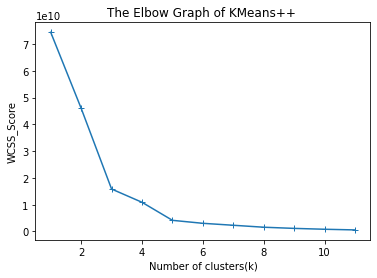

In [260]:
plt.plot(range(1,12), wcss_score, marker='+')
plt.title('The Elbow Graph of KMeans++ ')
plt.xlabel('Number of clusters(k)')
plt.ylabel('WCSS_Score')
plt.show()

## As we see the elbow point is between 2 and 4 so the value of k for kmeans will be 3

In [261]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state= 42)

In [262]:
x

,Month,Day_of_Month,Sessions,Total_amount
0,12,1,1,15.30
1,12,1,1,20.34
2,12,1,1,22.00
3,12,1,1,20.34
4,12,1,1,20.34
...,...,...,...,...
541904,12,9,3,10.20
541905,12,9,3,12.60
541906,12,9,3,16.60
541907,12,9,3,16.60


In [263]:
kmeans.fit(x)

KMeans(n_clusters=4, random_state=42)

In [264]:
kmeans.inertia_

10903725794.98829

In [265]:
kmeans.cluster_centers_

array([[ 7.60594605e+00,  1.50361630e+01,  1.49138081e+00,
         2.06875669e+01],
       [ 1.20000000e+01,  9.00000000e+00,  3.00000000e+00,
        -1.68469600e+05],
       [ 1.20000000e+01,  9.00000000e+00,  3.00000000e+00,
         1.68469600e+05],
       [ 3.50000000e+00,  1.40000000e+01,  1.50000000e+00,
        -5.80768000e+04]])

In [266]:
kmeans.n_iter_

2

In [267]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [268]:
y_predict_kmeans=kmeans.fit_predict(x)

In [269]:
y_predict_kmeans

array([0, 0, 0, ..., 0, 0, 0])

In [270]:

temp_df=x

In [271]:
temp_df['Labels']=kmeans.labels_

<ipython-input-271-821f9f469557>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Labels']=kmeans.labels_


In [272]:
temp_df

,Month,Day_of_Month,Sessions,Total_amount,Labels
0,12,1,1,15.30,0
1,12,1,1,20.34,0
2,12,1,1,22.00,0
3,12,1,1,20.34,0
4,12,1,1,20.34,0
...,...,...,...,...,...
541904,12,9,3,10.20,0
541905,12,9,3,12.60,0
541906,12,9,3,16.60,0
541907,12,9,3,16.60,0


In [273]:
temp_df['Labels'].value_counts()

0    406825
3         2
2         1
1         1
Name: Labels, dtype: int64

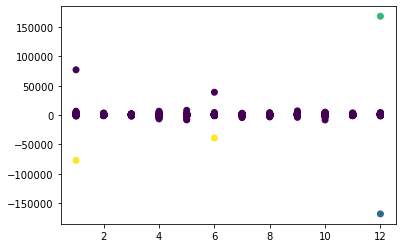

In [274]:
plt.scatter(temp_df['Month'],temp_df['Total_amount'],c=temp_df['Labels'])

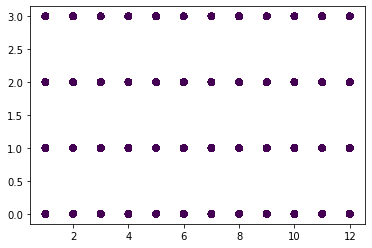

In [275]:
plt.scatter(temp_df['Month'],temp_df['Sessions'],c=temp_df['Labels'])

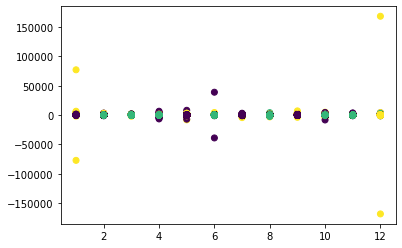

In [276]:
plt.scatter(temp_df['Month'],temp_df['Total_amount'],c=temp_df['Sessions'])

In [277]:
ind=temp_df[temp_df['Total_amount']<0].index

In [278]:
temp_df.drop(ind,inplace=True)

E:\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


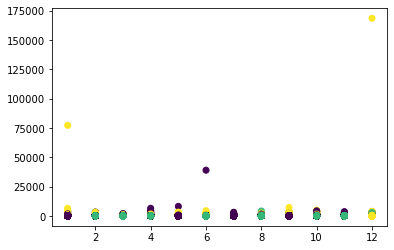

In [279]:
plt.scatter(temp_df['Month'],temp_df['Total_amount'],c=temp_df['Sessions'])

In [280]:
from mpl_toolkits import mplot3d

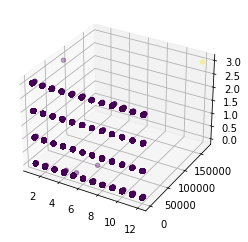

In [281]:
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# # defining all 3 axis
# z = np.linspace(0, 1, 100)
# x = z * np.sin(25 * z)
# y = z * np.cos(25 * z)
 
# plotting
ax.scatter(temp_df['Month'],temp_df['Total_amount'],temp_df['Sessions'] ,c=temp_df['Labels'])
# ax.set_title('3D line plot geeks for geeks')
plt.show()


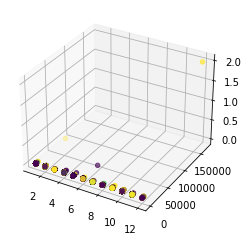

In [282]:
ax = plt.axes(projection ='3d')
ax.scatter(temp_df['Month'],temp_df['Total_amount'],temp_df['Labels'],c=temp_df['Sessions'])
plt.show()

# RFM

In [283]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day_of_Month,Month,Year,Total_amount,hour,Sessions
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,12,2010,15.30,8,Early Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,20.34,8,Early Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,12,2010,22.00,8,Early Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,20.34,8,Early Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,20.34,8,Early Morning


In [284]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day_of_Month,Month,Year,Total_amount,hour,Sessions
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,9,12,2011,10.20,12,Morning
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,9,12,2011,12.60,12,Morning
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,9,12,2011,16.60,12,Morning
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,9,12,2011,16.60,12,Morning
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,9,12,2011,14.85,12,Morning


In [285]:
df.duplicated().sum()

5225

In [286]:
df.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day_of_Month,Month,Year,Total_amount,hour,Sessions
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,12,2010,15.30,8,Early Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,20.34,8,Early Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,12,2010,22.00,8,Early Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,20.34,8,Early Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,20.34,8,Early Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,9,12,2011,10.20,12,Morning
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,9,12,2011,12.60,12,Morning
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,9,12,2011,16.60,12,Morning
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,9,12,2011,16.60,12,Morning


In [287]:
# we need to find out these 3 values Recency,Frequency,Monetary Value

In [288]:
# Recency means how recently customer has made purchase
recent_pur_date=df.InvoiceDate.max()
recent_pur_date

Timestamp('2011-12-09 12:50:00')

In [289]:
# df.dtypes

In [290]:
recency=df.groupby(['CustomerID']).agg({'InvoiceDate': lambda y:((recent_pur_date - y.max()).days)})

In [291]:
recency

,InvoiceDate
CustomerID,
12346.0,325
12347.0,1
12348.0,74
12349.0,18
12350.0,309
...,...
18280.0,277
18281.0,180
18282.0,7


In [292]:
frequency=df.groupby(['CustomerID'])[['InvoiceNo']].count()

In [293]:
frequency

,InvoiceNo
CustomerID,
12346.0,2
12347.0,182
12348.0,31
12349.0,73
12350.0,17
...,...
18280.0,10
18281.0,7
18282.0,13


In [294]:
monetary=df.groupby(['CustomerID'])[['Total_amount']].sum()

In [295]:
monetary

,Total_amount
CustomerID,
12346.0,0.00
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40
...,...
18280.0,180.60
18281.0,80.82
18282.0,176.60


In [302]:
rfm_data=pd.concat([recency,frequency,monetary],axis=1)

In [303]:
rfm_data

,InvoiceDate,InvoiceNo,Total_amount
CustomerID,,,
12346.0,325,2,0.00
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,13,176.60


In [304]:
rfm_data.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frquency','Total_amount':'Monetary_Value'},inplace=True)

In [305]:
rfm_data

,Recency,Frquency,Monetary_Value
CustomerID,,,
12346.0,325,2,0.00
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,13,176.60


In [307]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()

rfm_scaled_data=std_scaler.fit_transform(rfm_data)

In [308]:
rfm_scaled_data

array([[ 2.32202285, -0.3917197 , -0.23100099],
       [-0.89373323,  0.38265697,  0.29343167],
       [-0.1691956 , -0.26695902, -0.01231622],
       ...,
       [-0.83418219, -0.34439668, -0.20951263],
       [-0.87388289,  2.85205812,  0.02390005],
       [-0.48680114, -0.0991774 , -0.00744423]])

In [325]:
wcss_score_rfm = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i,init='k-means++', random_state= 42)
    kmeans.fit(rfm_scaled_data)
    wcss_score_rfm.append(kmeans.inertia_)

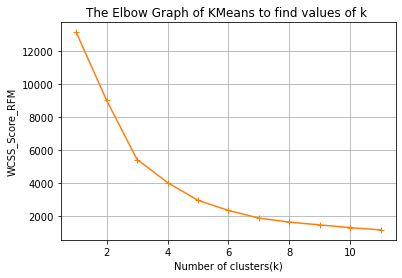

In [326]:
plt.plot(range(1,12), wcss_score_rfm, marker='+',color='tab:orange')
plt.title('The Elbow Graph of KMeans to find values of k ')
plt.xlabel('Number of clusters(k)')
plt.ylabel('WCSS_Score_RFM')
plt.grid()
plt.show()

In [331]:
kmeans = KMeans(n_clusters=4,init='k-means++' ,random_state= 42)

In [336]:
kmeans.fit(rfm_scaled_data)

KMeans(n_clusters=4, random_state=42)

In [337]:
clusters=kmeans.fit_predict(rfm_scaled_data)

In [374]:
rfm_data['Clusters']=clusters

In [375]:
rfm_data

,Recency,Frquency,Monetary_Value,Clusters
CustomerID,,,,
12346.0,325,2,0.00,3
12347.0,1,182,4310.00,0
12348.0,74,31,1797.24,0
12349.0,18,73,1757.55,0
12350.0,309,17,334.40,3
...,...,...,...,...
18280.0,277,10,180.60,3
18281.0,180,7,80.82,3
18282.0,7,13,176.60,0


In [376]:
rfm_data.Clusters.value_counts()

0    3268
3    1095
1       5
2       4
Name: Clusters, dtype: int64

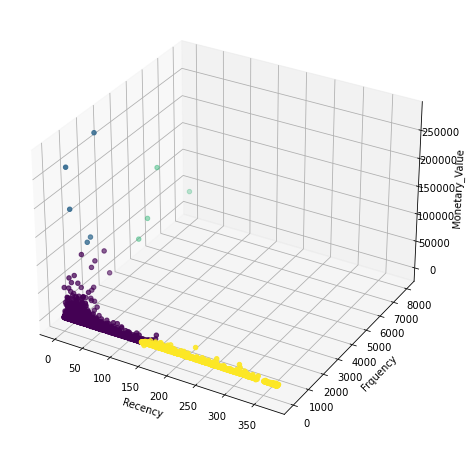

In [382]:
plt.figure(figsize=[8,8])
ax = plt.axes(projection ='3d')
ax.scatter(rfm_data['Recency'],rfm_data['Frquency'],rfm_data['Monetary_Value'],c=rfm_data['Clusters'])
ax.set_xlabel('Recency')
ax.set_ylabel('Frquency')
ax.set_zlabel('Monetary_Value')
plt.show()


In [387]:
centers_of_clusters=kmeans.cluster_centers_
centers_of_clusters

array([[-5.13746963e-01,  5.75587918e-02,  1.37920924e-02],
       [-8.24257020e-01,  3.95941676e+00,  2.31438329e+01],
       [-8.93733232e-01,  2.50422518e+01,  7.65089359e+00],
       [ 1.54217097e+00, -2.81650623e-01, -1.74962604e-01]])

In [391]:
centers_of_clusters.ndim

2

In [393]:
centers_of_clusters[1]

array([-0.82425702,  3.95941676, 23.14383293])

In [392]:
centers_of_clusters[:,1]

array([ 0.05755879,  3.95941676, 25.04225176, -0.28165062])

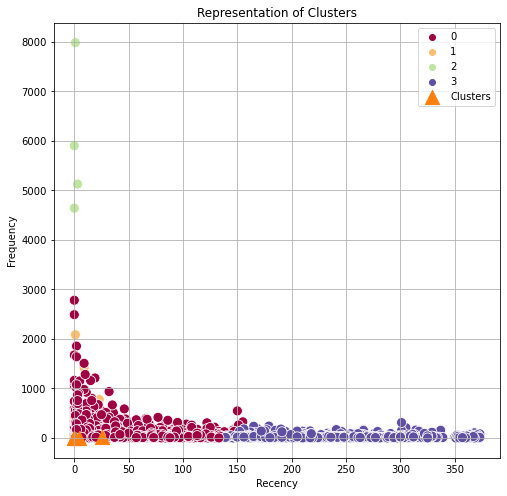

In [403]:
plt.figure(figsize=[8,8])
sns.scatterplot(x='Recency',y='Frquency',hue='Clusters',s=100,data=rfm_data,palette='Spectral')
plt.scatter(centers_of_clusters[:,1],centers_of_clusters[:,1],marker='^',s=200,label='Clusters')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title("Representation of Clusters")
plt.grid()
plt.legend()
plt.show()

# Interpretation

We use RFM model for segmentation of cutsomer where R stands for recency,F stands for frequency and M stands for monetary value.
* Recency means how recently customer has made purchases
* Frquency means how often a customer make purchases
* Monetary Value means how much money customer spent on purchase

* High Recency score means customer has more recentenly done shopping
* High Frequency score means customer more frequntly customer make purchases and he is a loyal customer
* High Monetary value means customer spend large money he must be treated as valuable customer

## High Recency High Frequency High Monetray Value

* Those customers whose RFM values are high are very valuable and important for e-commerce platform 
* As these customers have most recently make purchase.
* Do shopping very frequently as compare to others and 
* They also spent large amount of money on shopping.

* So for this cluster of customers company should develop schemes to benefit customers and give them    more discount.



## Low Recency Low Frequency Low Monetray Value

* They have not do any shopping recently.
* They does shopping very less frquently.
* They spent less money on shopping.
* These customers whose RFM values are low are less valuable customers.
* These customers are inactive shoppers.



## High Recency Low Frequency Low Monetray Value

* These customer have recently made a purchase.
* But they are not frequent customer means make purchases hardly
* They spent less money on purchasing products
* These customers does not make much profit to company as they have low frequency and monetary value.



## Low Recency High Frequency High Monetray Value

* These customer do not make any recent purchase.
* But these customer make purchases oftenly.
* And these customer spend large amount of money
* These customers are valuable for company and are also loyal to company.They add up to comapny's revenue.
